# Prediction Exploration

In [1]:
import pandas as pd
import json
import joblib
from utils.data_cleaning import clean_df

## Load Data

In [2]:
url = 'https://s3-us-west-2.amazonaws.com/pcadsassessment/parking_citations.corrupted.csv'
df = pd.read_csv(url)

/home/peterdraznik/coding_practice/grainger_assessment/1_traffic_citations_modeling_pipeline/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_with_make = df[~df['Make'].isnull()]

# %%

# NOTE: Get Popular Makes
print('Setting up Popular Makes..')
s_num_citations_per_make = df_with_make[df_with_make['Make'] != 'OTHR']['Make'].value_counts()
num_popular_makes = 25
popular_makes = s_num_citations_per_make[:num_popular_makes].keys().tolist()

    

Setting up Popular Makes..


In [4]:
df_with_make['is_popular_make'] = df_with_make['Make'].isin(popular_makes)
df_popular_makes = df_with_make[df_with_make['is_popular_make'] == True]
df_non_popular_makes = df_with_make[df_with_make['is_popular_make'] == False]

/home/peterdraznik/coding_practice/grainger_assessment/1_traffic_citations_modeling_pipeline/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
model_name = 'current'
model = joblib.load(f'../models/{model_name}.joblib')
model_extra_param_info = None
with open('../models/current_info.json') as json_file:
    model_extra_param_info = json.load(json_file)

In [6]:
df_popular_makes = clean_df(df_popular_makes, **model_extra_param_info, should_add_label=False, path_to_project_root='../')
df_non_popular_makes = clean_df(df_non_popular_makes, **model_extra_param_info, should_add_label=False, path_to_project_root='../')

/home/peterdraznik/coding_practice/grainger_assessment/1_traffic_citations_modeling_pipeline/venv/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/peterdraznik/coding_practice/grainger_assessment/1_traffic_citations_modeling_pipeline/utils/data_cleaning.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_to_convert_to_int)
/home/peterdraznik/coding_practice/grainger_assessment/1_traffic_citations_modeling_pipeline/utils/data_cleaning.py:40: SettingWithCopyWarning: 
A value is trying to be

In [9]:
X_popular_makes = df_popular_makes[[col for col in df_popular_makes.columns if col not in  ['Make', 'is_popular_make']]]
X_non_popular_makes = df_popular_makes[[col for col in df_non_popular_makes.columns if col not in  ['Make', 'is_popular_make']]]

In [11]:
y_pred = model.predict_proba(X_popular_makes).tolist()
y_pred_ = pd.Series([pred[-1] for pred in y_pred])

In [13]:
y_pred_true = y_pred_[y_pred_>=0.5]
y_pred_false = y_pred_[y_pred_<0.5]
len(y_pred_true) / len(y_pred)

0.9817057774911476

In [15]:
y_pred_false.describe()


count    72165.000000
mean         0.397942
std          0.091141
min          0.035497
25%          0.357321
50%          0.416236
75%          0.468368
max          0.499997
dtype: float64

In [16]:
%matplotlib inline

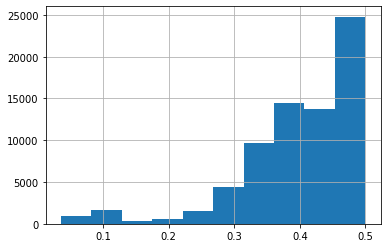

In [17]:
y_pred_false.hist()

Of the citations expected to be popular makes that were predicted incorrectly the classifier was fairly uncertain in its incorrect decision


In [23]:
y_pred = model.predict_proba(X_non_popular_makes).tolist()
y_pred_ = pd.Series([pred[0] for pred in y_pred])

In [24]:
y_pred_false = y_pred_[y_pred_>=0.5]
y_pred_true = y_pred_[y_pred_<0.5]
len(y_pred_false) / len(y_pred)

0.01829422250885241

In [25]:
y_pred_true.describe()


count    3.872523e+06
mean     1.021351e-01
std      5.834955e-02
min      1.245177e-02
25%      7.289888e-02
50%      9.049440e-02
75%      1.106639e-01
max      4.999979e-01
dtype: float64

In [26]:
%matplotlib inline

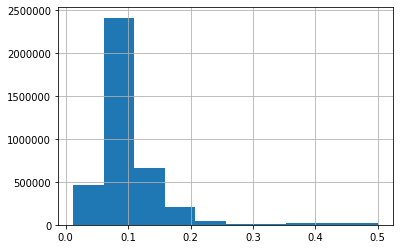

In [27]:
y_pred_true.hist()

Of the citations expected to be non popular makes that were predicted incorrectly the classifier was typically fairly certain in its incorrect decision
